In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r"D:\insurance_claims_data.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.drop('_c39', axis=1, inplace = True)

In [7]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
df.duplicated().sum()

0

In [10]:
#number of unique value in each features

for col in df.columns.values:
    print(f"Unique values in {col} : {df[col].nunique()}")

Unique values in months_as_customer : 391
Unique values in age : 46
Unique values in policy_number : 1000
Unique values in policy_bind_date : 951
Unique values in policy_state : 3
Unique values in policy_csl : 3
Unique values in policy_deductable : 3
Unique values in policy_annual_premium : 991
Unique values in umbrella_limit : 11
Unique values in insured_zip : 995
Unique values in insured_sex : 2
Unique values in insured_education_level : 7
Unique values in insured_occupation : 14
Unique values in insured_hobbies : 20
Unique values in insured_relationship : 6
Unique values in capital-gains : 338
Unique values in capital-loss : 354
Unique values in incident_date : 60
Unique values in incident_type : 4
Unique values in collision_type : 4
Unique values in incident_severity : 4
Unique values in authorities_contacted : 5
Unique values in incident_state : 7
Unique values in incident_city : 7
Unique values in incident_location : 1000
Unique values in incident_hour_of_the_day : 24
Unique valu

In [11]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [12]:
for col in df:
    print(f"? in {col} : {df[(df[col] == '?')].any().sum()}")

? in months_as_customer : 0
? in age : 0
? in policy_number : 0
? in policy_bind_date : 0
? in policy_state : 0
? in policy_csl : 0
? in policy_deductable : 0
? in policy_annual_premium : 0
? in umbrella_limit : 0
? in insured_zip : 0
? in insured_sex : 0
? in insured_education_level : 0
? in insured_occupation : 0
? in insured_hobbies : 0
? in insured_relationship : 0
? in capital-gains : 0
? in capital-loss : 0
? in incident_date : 0
? in incident_type : 0
? in collision_type : 39
? in incident_severity : 0
? in authorities_contacted : 0
? in incident_state : 0
? in incident_city : 0
? in incident_location : 0
? in incident_hour_of_the_day : 0
? in number_of_vehicles_involved : 0
? in property_damage : 39
? in bodily_injuries : 0
? in witnesses : 0
? in police_report_available : 39
? in total_claim_amount : 0
? in injury_claim : 0
? in property_claim : 0
? in vehicle_claim : 0
? in auto_make : 0
? in auto_model : 0
? in auto_year : 0
? in fraud_reported : 0


In [13]:
df.rneplace('?', p.NaN, inplace = True)

In [14]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

<AxesSubplot:>

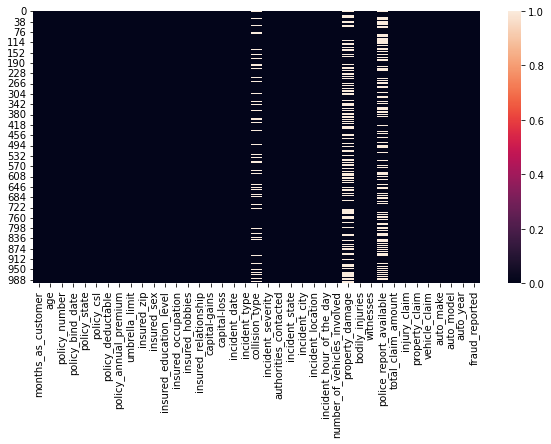

In [15]:
py.figure(figsize = (10,5))
sns.heatmap(df.isnull())

In [16]:
df['fraud_reported'].value_counts(normalize = True)

N    0.753
Y    0.247
Name: fraud_reported, dtype: float64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

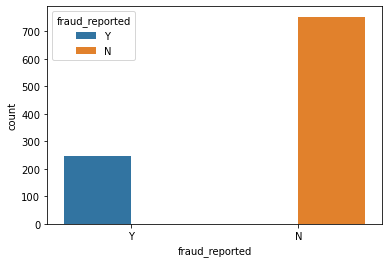

In [17]:
sns.countplot(x='fraud_reported', data= df, hue='fraud_reported')

<AxesSubplot:xlabel='age', ylabel='count'>

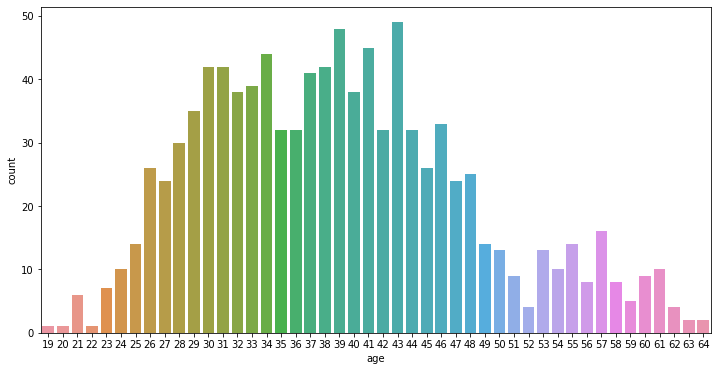

In [18]:
py.figure(figsize = (12,6))
sns.countplot(x = 'age', data=df)

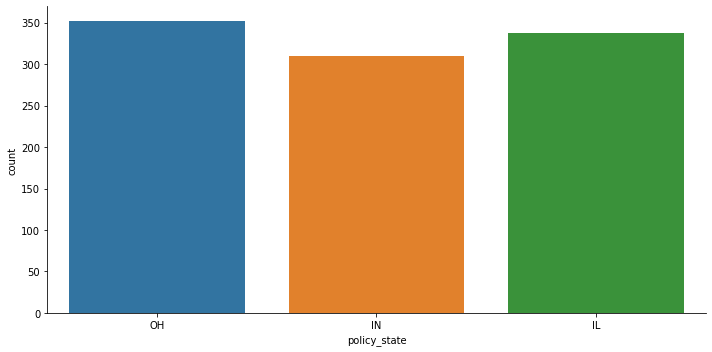

In [19]:
sns.catplot('policy_state', data = df, kind='count', aspect=2)

In [20]:
cat_values = df.dtypes[df.dtypes == 'object'].index

In [21]:
for i in cat_values:
    print(i)

policy_bind_date
policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
fraud_reported


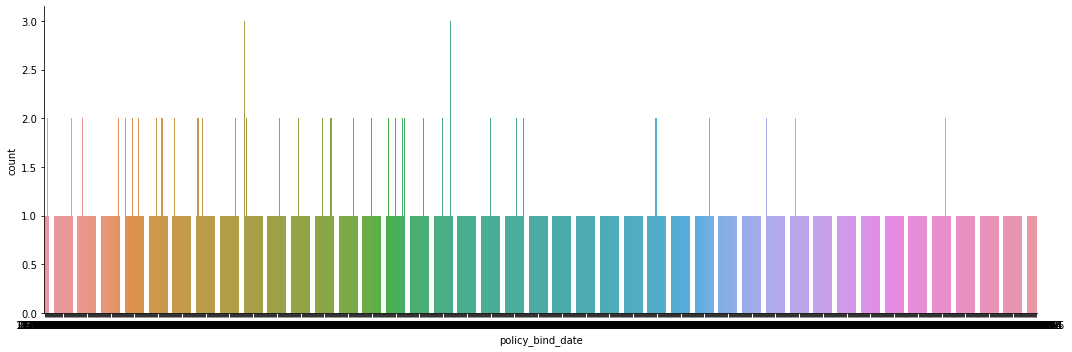

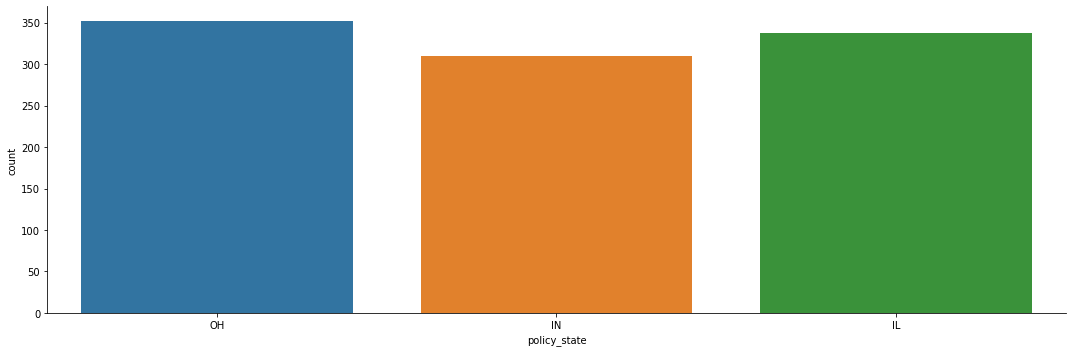

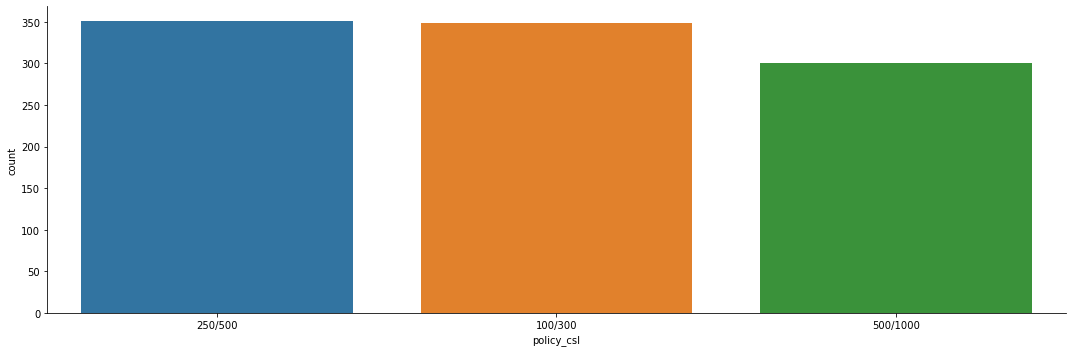

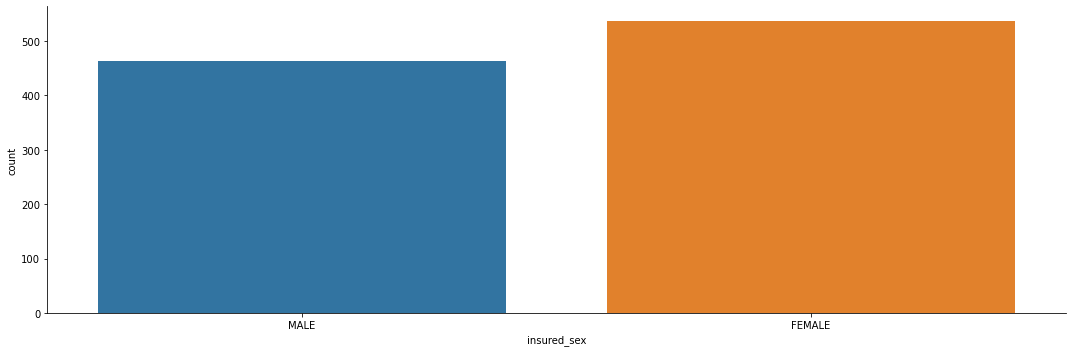

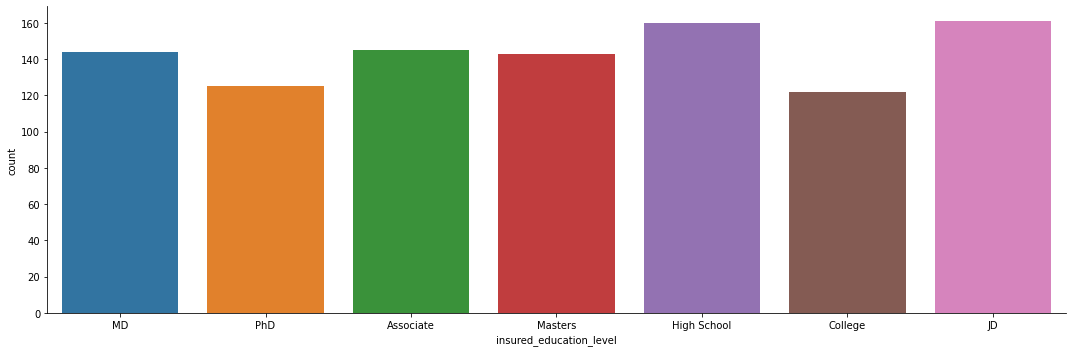

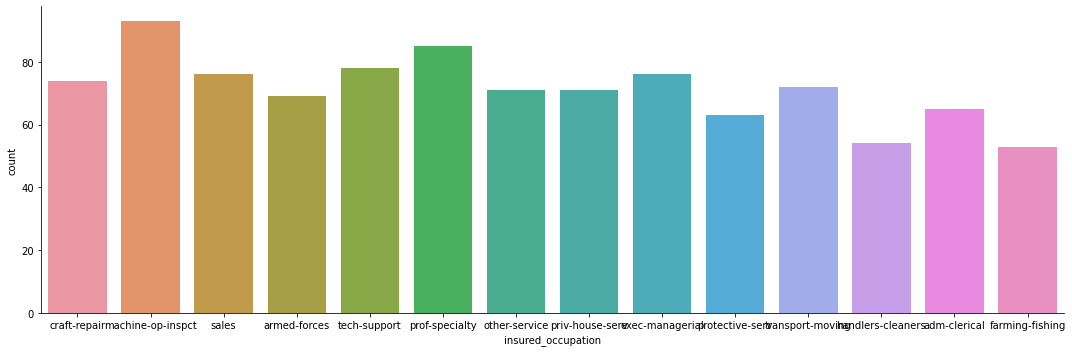

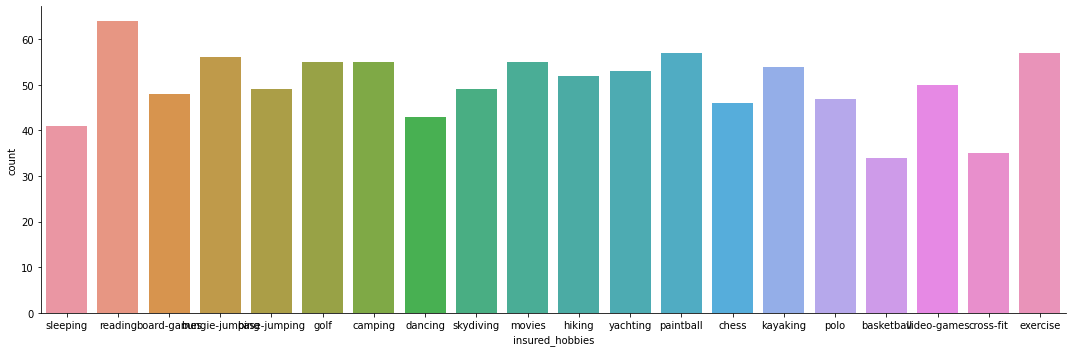

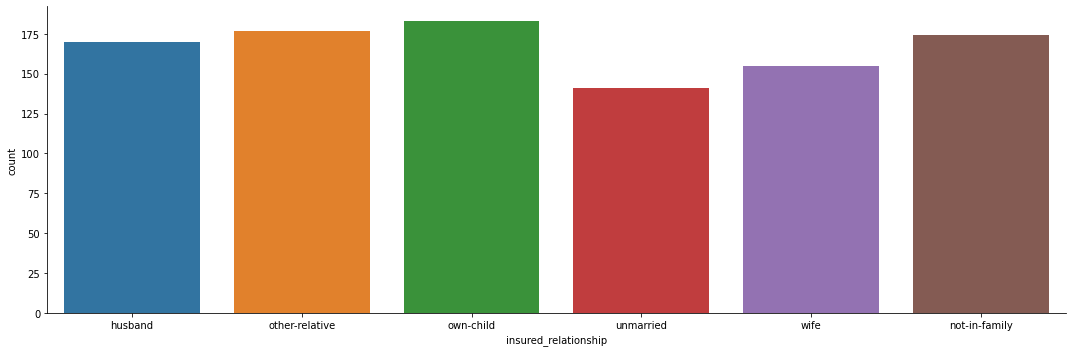

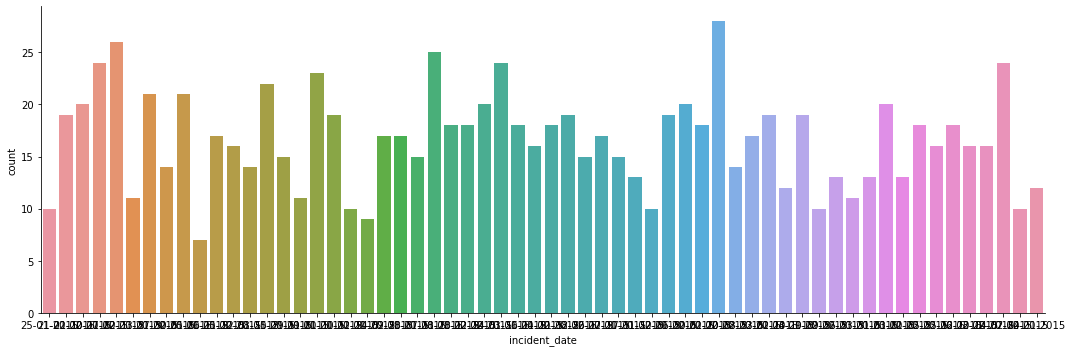

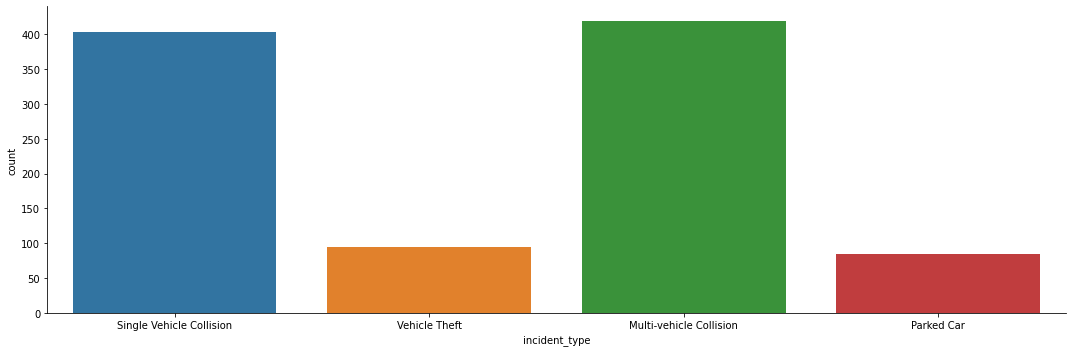

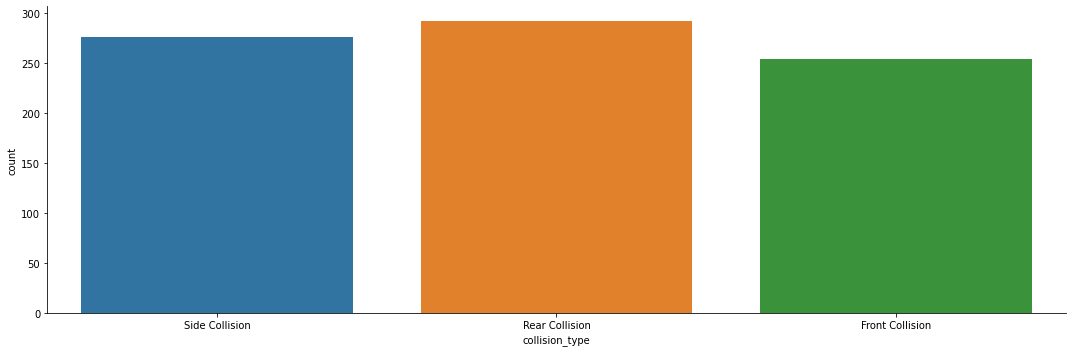

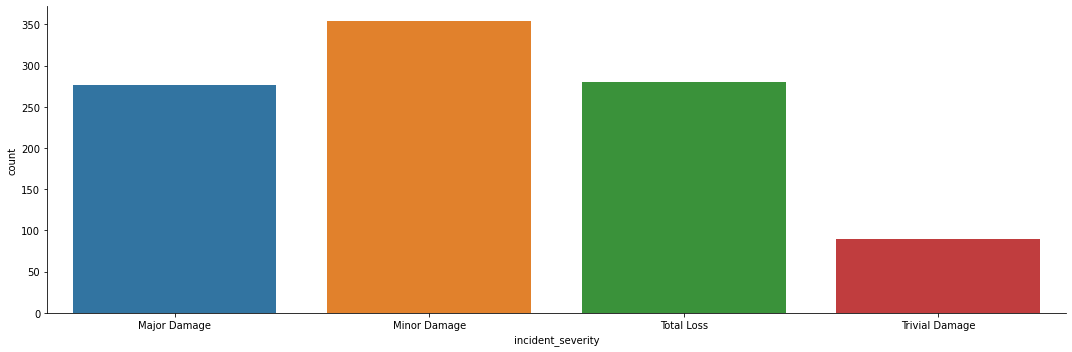

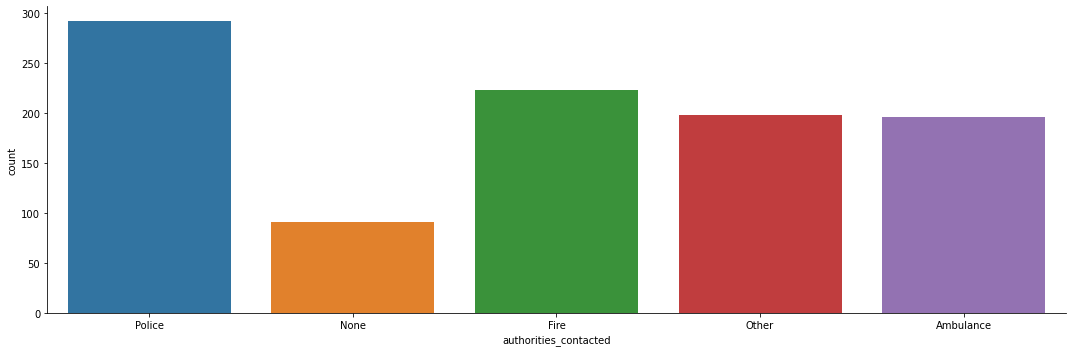

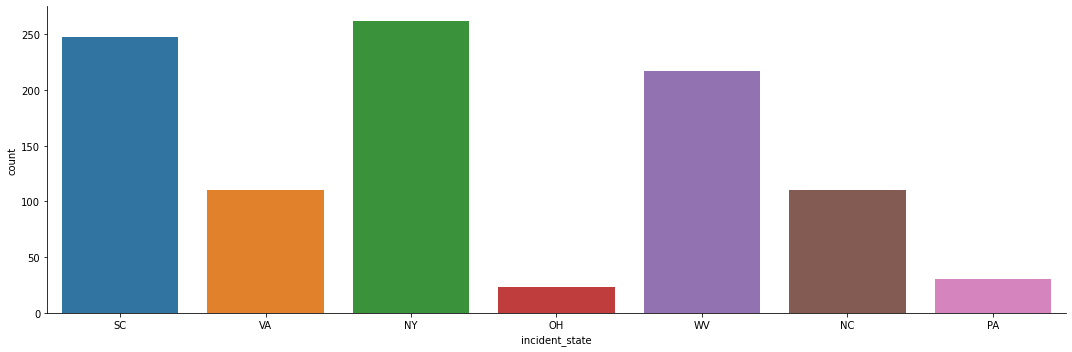

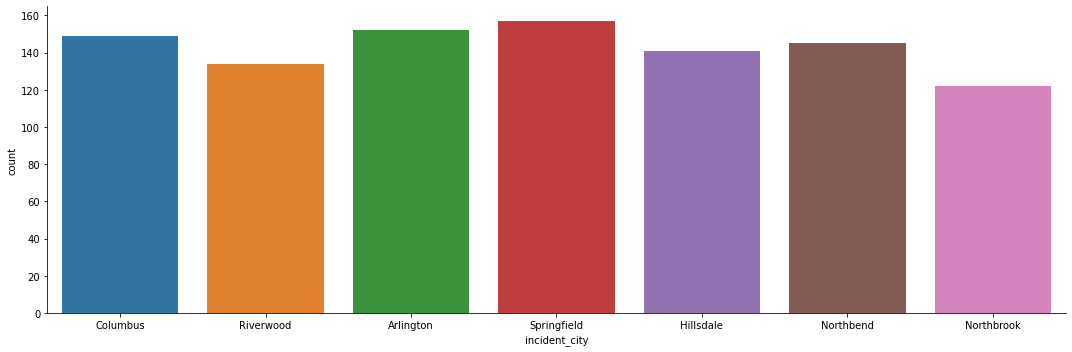

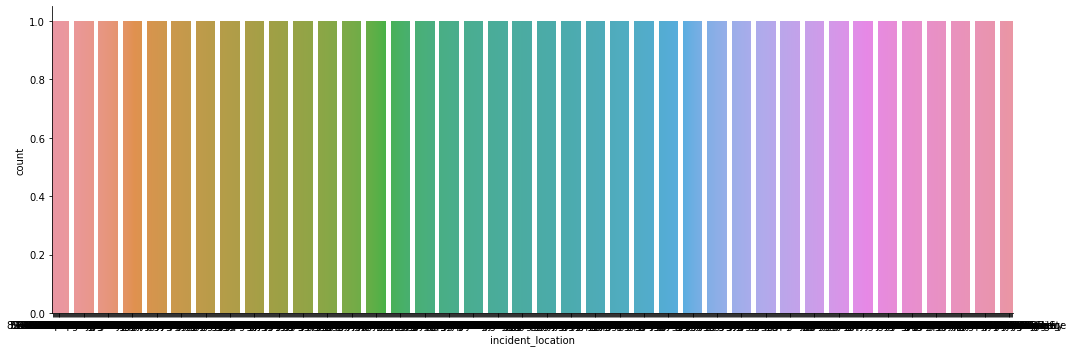

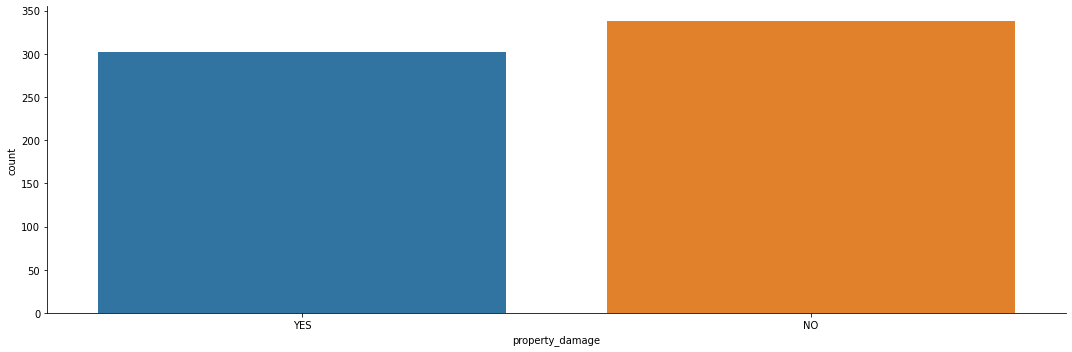

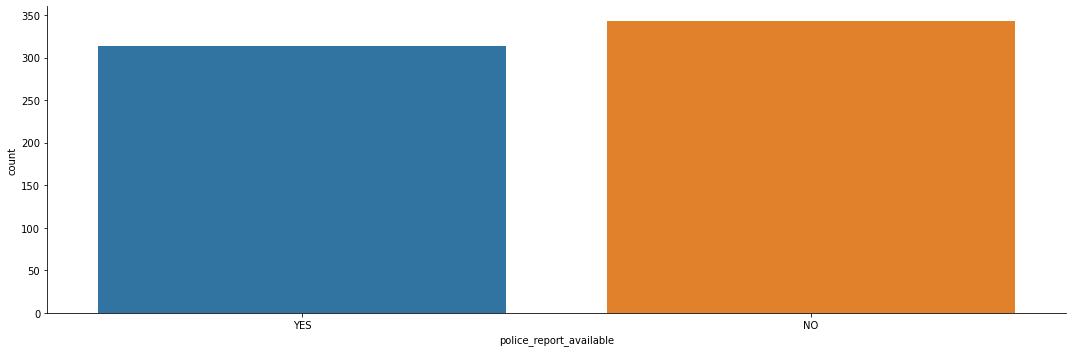

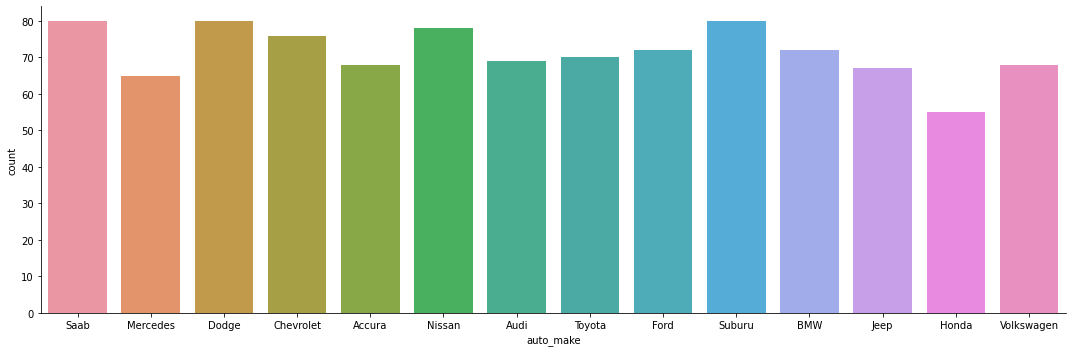

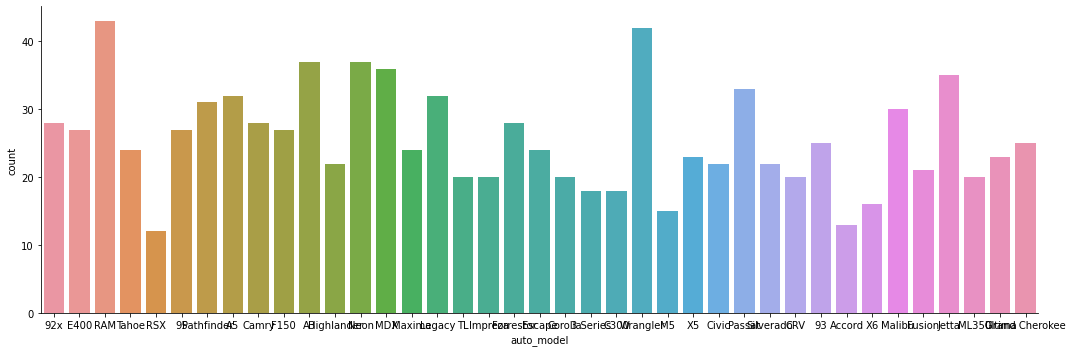

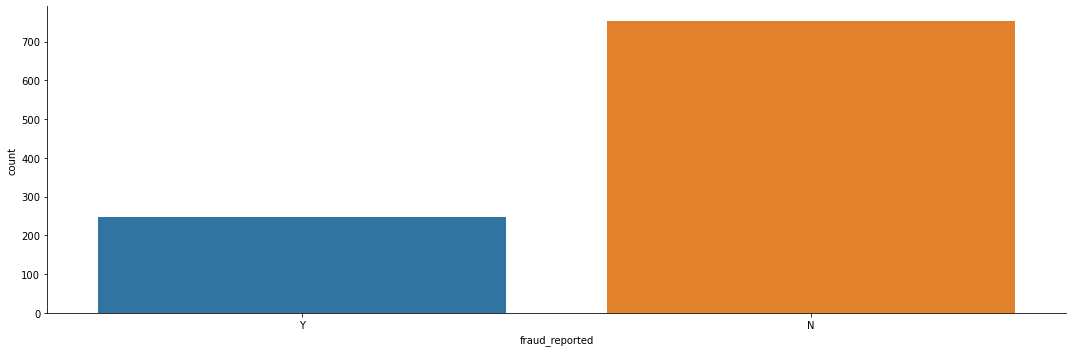

In [22]:
for i in cat_values:
    sns.catplot(i, data=df, kind = 'count', aspect=3, height=5)

months_as_customer                AxesSubplot(0.125,0.772143;0.168478x0.107857)
age                            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
policy_number                  AxesSubplot(0.529348,0.772143;0.168478x0.107857)
policy_deductable              AxesSubplot(0.731522,0.772143;0.168478x0.107857)
policy_annual_premium             AxesSubplot(0.125,0.642714;0.168478x0.107857)
umbrella_limit                 AxesSubplot(0.327174,0.642714;0.168478x0.107857)
insured_zip                    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
capital-gains                  AxesSubplot(0.731522,0.642714;0.168478x0.107857)
capital-loss                      AxesSubplot(0.125,0.513286;0.168478x0.107857)
incident_hour_of_the_day       AxesSubplot(0.327174,0.513286;0.168478x0.107857)
number_of_vehicles_involved    AxesSubplot(0.529348,0.513286;0.168478x0.107857)
bodily_injuries                AxesSubplot(0.731522,0.513286;0.168478x0.107857)
witnesses                         AxesSu

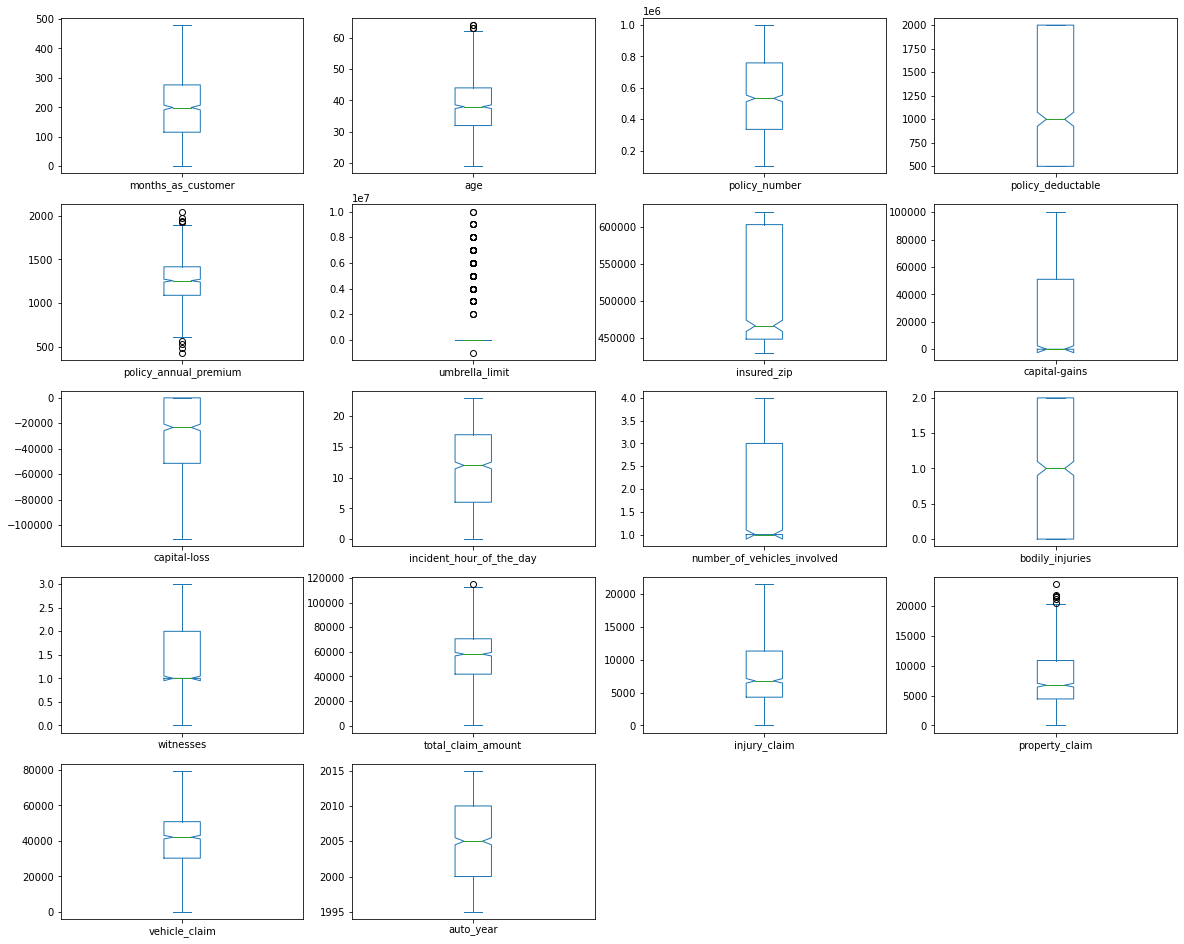

In [23]:
# Plotting the boxplot in order to check few statistical values and outliers

df.plot(kind = 'box', subplots = True, layout = (6,4), figsize = (20,20), notch = True)

In [24]:
# for loop to plot graphs between fraud_reported and different numerical features of the dataset....

In [25]:
num_col = df.dtypes[df.dtypes != 'object']

In [26]:
for col in num_col.index.values:
    print(col)

months_as_customer
age
policy_number
policy_deductable
policy_annual_premium
umbrella_limit
insured_zip
capital-gains
capital-loss
incident_hour_of_the_day
number_of_vehicles_involved
bodily_injuries
witnesses
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_year


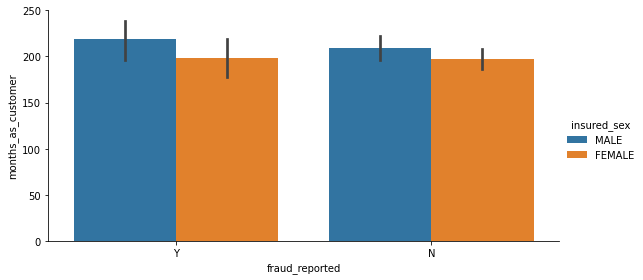

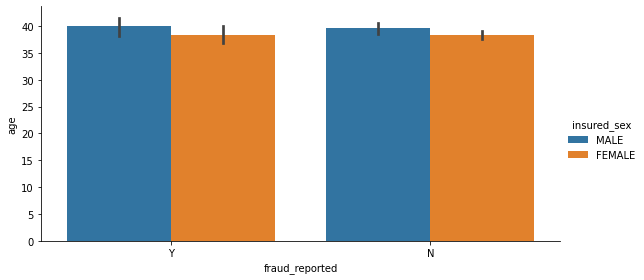

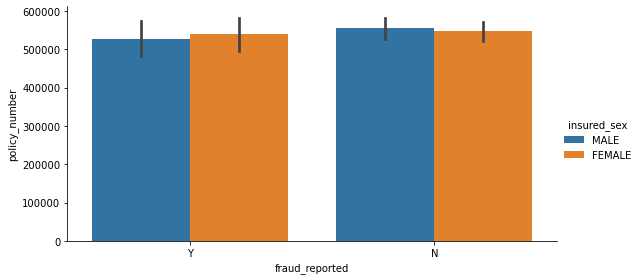

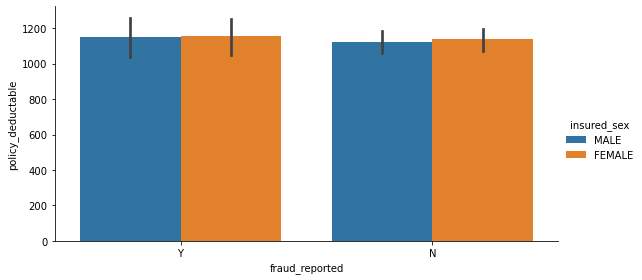

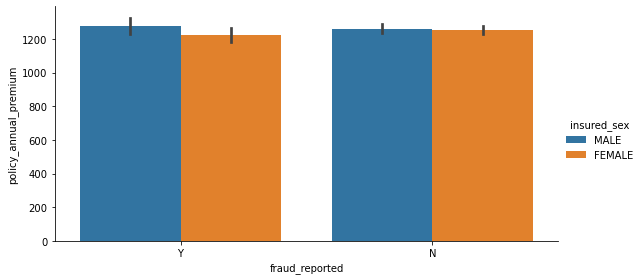

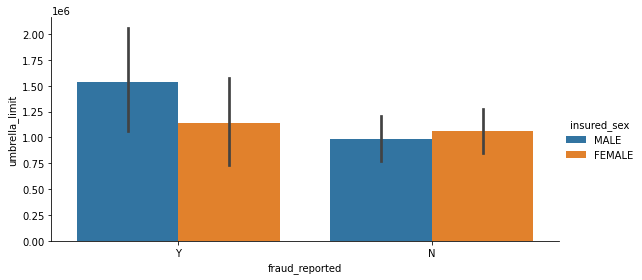

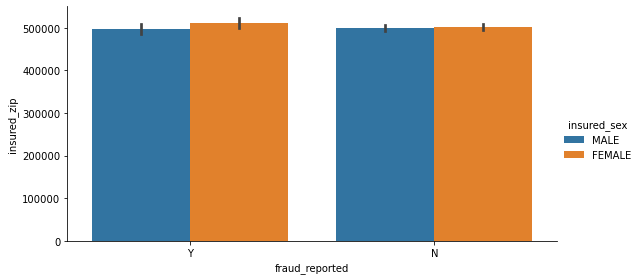

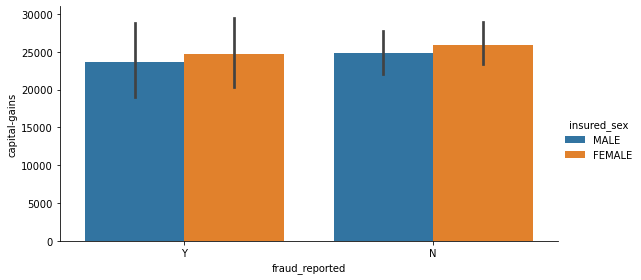

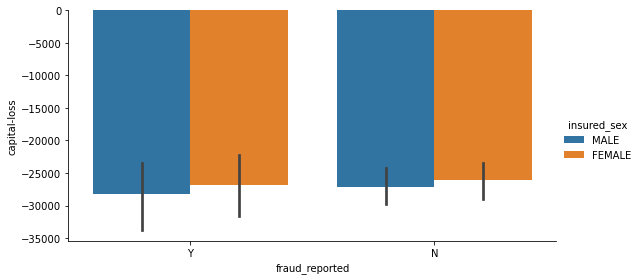

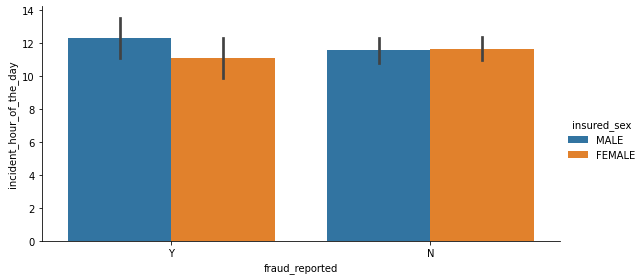

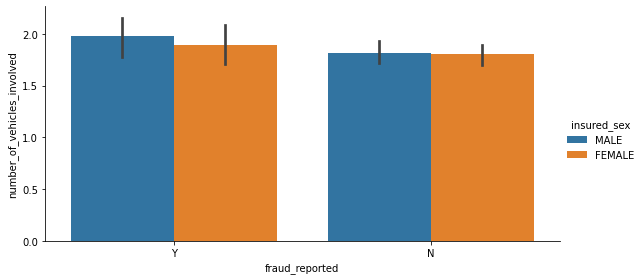

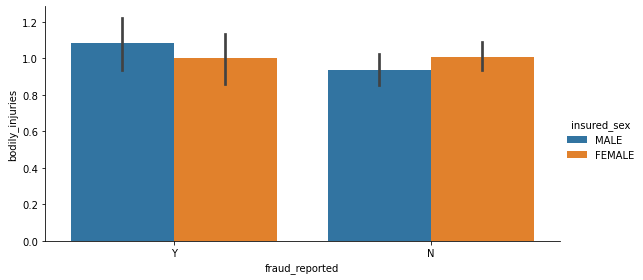

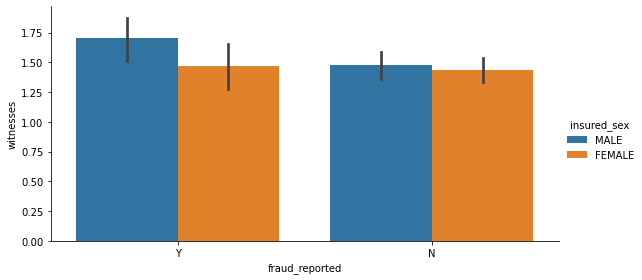

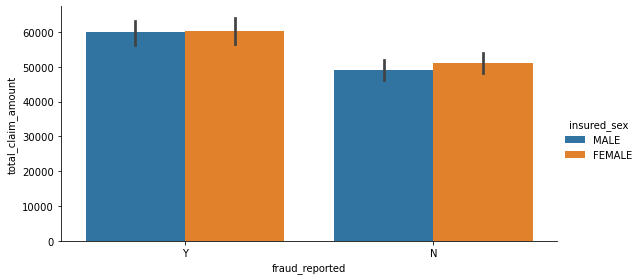

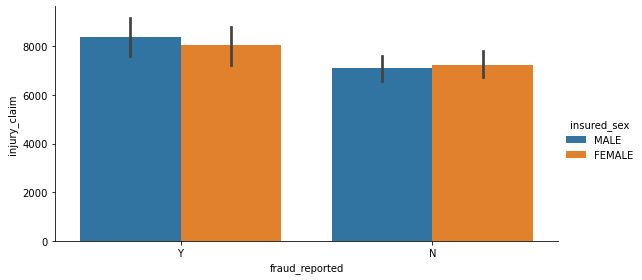

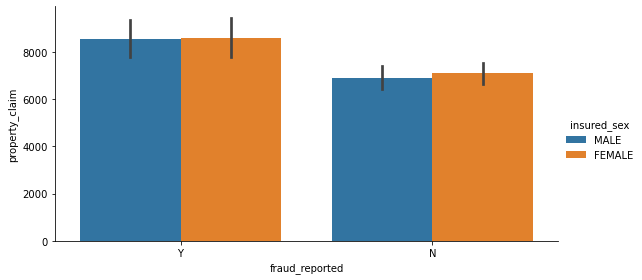

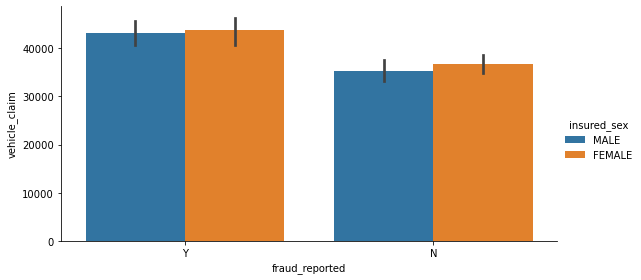

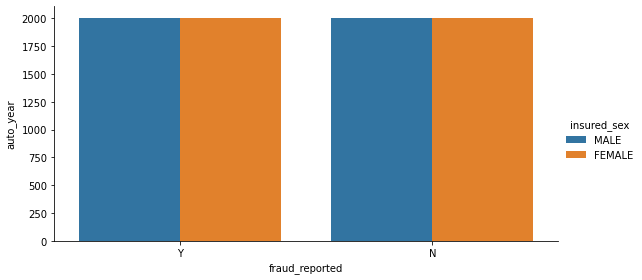

In [27]:
for col in num_col.index:
    sns.catplot( y= col,
                x='fraud_reported',
                data=df,aspect=2, height=4,
                hue='insured_sex',
               kind='bar'
    )

<Figure size 720x432 with 0 Axes>

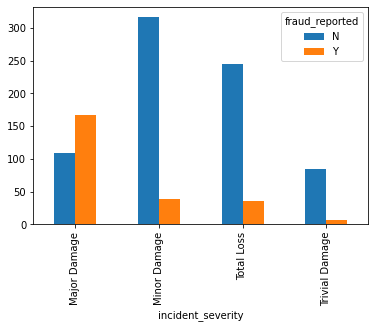

<Figure size 720x432 with 0 Axes>

In [28]:
pd.crosstab(df['incident_severity'], df['fraud_reported']).plot(kind = 'bar')
py.figure(figsize = (10,6))

# As we can observe that incidents involving minor damage have higher cases of fraud report.

<Figure size 720x432 with 0 Axes>

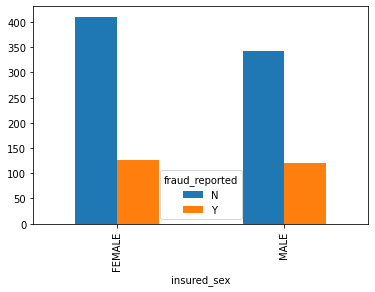

<Figure size 720x432 with 0 Axes>

In [29]:
#Let's analyze fraud reporting gender wise

pd.crosstab(df['insured_sex'], df['fraud_reported']).plot(kind = 'bar')
py.figure(figsize = (10,6))

<AxesSubplot:xlabel='age'>

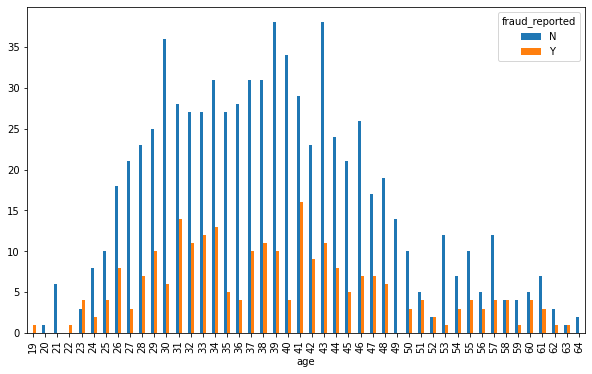

In [30]:
pd.crosstab(df['age'], df['fraud_reported']).plot(kind='bar', figsize=(10,6))

In [31]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y


In [32]:
df.shape

(1000, 39)

In [33]:
del_cols = ['policy_bind_date','policy_number','policy_csl','incident_date','incident_location','insured_zip']

df.drop(del_cols, axis=1, inplace=True)

In [34]:
df.shape

(1000, 33)

In [35]:
from sklearn.preprocessing import LabelEncoder

categ_values = df.dtypes[df.dtypes == 'object']

le = LabelEncoder()

for vals in categ_values.index.values:
    df[vals] = le.fit_transform(df[vals].astype(str))
    
df.head(4)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,3,1,4,5,5,8,1,2,0,0,2,5070,780,780,3510,8,12,2007,1
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,2,1,2,0,63400,6340,6340,50720,3,34,2014,1


In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(1000, 33)

In [38]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.082966,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,-0.004631,-0.010162,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.086068,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.002733,-0.015679,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.037564,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.030719,0.013384,0.022960,-0.024713,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.041188,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,-0.006837,-0.022765,0.066639,0.004936,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.013508,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,-0.052172,0.026780,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.040219,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.015237,0.022743,-0.006738,0.034177,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,0.003799,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,-0.012453,-0.020297,0.042463,-0.029056,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.053458,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.031510,-0.012072,0.019211,0.016119,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,0.003842,0.004076,0.004731,-0.007811,-0.022761,0.000390,-0.018435,-0.015368,-0.047800,-0.000236,-0.014794,-0.020739,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
insured_hobbies,-0.093661,-0.081315,-0.038689,0.004061,-0.018019,-0.037000,-0.020317,0.021807,-0.011077,1.000000,-0.096772,0.054338,-0.031811,0.007711,0.030389,-0.024688,-0.028104,0.085764,0.018542,0.019979,0.012586,-0.005929,0.031373,-0.033971,0.041940,-0.004488,0.028393,0.012535,-0.016814,0.001525,0.030948,-0.014495,-0.046838


In [39]:
df['fraud_reported'].value_counts(normalize=True)

0    0.753
1    0.247
Name: fraud_reported, dtype: float64

In [40]:
x = df.drop("fraud_reported", axis=1)

y = df["fraud_reported"]

In [41]:
x.head(3)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,3,1,4,5,5,8,1,2,0,0,2,5070,780,780,3510,8,12,2007
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007


In [42]:
y.head(3)

0    1
1    1
2    0
Name: fraud_reported, dtype: int32

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x1 = scaler.fit_transform(x)
x2 = pd.DataFrame(x1, columns = x.columns)
x2.head(3)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,1.187173,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,-1.437957,1.011331,0.953851,0.766005,0.593292,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.823865,-0.026342,0.009759,0.461838,0.000000,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.016856,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.901927,0.953851,1.691132,1.547138,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.823865,1.171013,-1.210174,-1.338700,1.207363,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,1.187173,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,0.347586,0.358023,0.953851,-1.084249,-0.360554,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.140056,-1.223697,1.229693,1.362107,-1.207363,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491


In [44]:
# Dataset is imbalanced, making the dataset as balanced using Imblearn.SMOTE-Synthetic Minority Over-sampling Technique

# SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. 
    # It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x2,y)

In [46]:
y_sm.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 101)

In [48]:
x_train.shape

(1204, 32)

In [49]:
x_test.shape

(302, 32)

In [50]:
# Evaluate the model on the training set

models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    'DecissionTreeClassifier' : DecisionTreeClassifier(),
    'SVM' : SVC(),
    'GaussianNB' : GaussianNB()
}

def fit_and_score(models):
    model_scores = {}
     
    for name, model in models.items():
            model.fit(x_train, y_train)
            y_pred=model.predict(x_test)
            model_scores[name] = model.score(y_test.reshape(1,-1), y_pred)
    return model_scores

In [51]:
# LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred=model.predict(x_test)

In [53]:
log_score = model.score(x_test, y_test)
log_score

0.7715231788079471

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       133
           1       0.86      0.71      0.78       169

    accuracy                           0.77       302
   macro avg       0.78      0.78      0.77       302
weighted avg       0.79      0.77      0.77       302



In [55]:
# RandomForestClassifier

random_model = RandomForestClassifier()
random_model.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
y_pred=random_model.predict(x_test)

In [57]:
random_score = random_model.score(x_test, y_test)
random_score

0.9105960264900662

In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       157
           1       0.92      0.89      0.91       145

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



In [59]:
# DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred=model.predict(x_test)

In [61]:
dec_score = model.score(x_test, y_test)
dec_score

0.8609271523178808

In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       168
           1       0.83      0.87      0.85       134

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



In [63]:
# SVC

model = SVC()
model.fit(x_train, y_train)

SVC()

In [64]:
y_pred=model.predict(x_test)

In [65]:
svc_score = model.score(x_test, y_test)
svc_score

0.8708609271523179

In [66]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       143
           1       0.93      0.82      0.87       159

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.88      0.87      0.87       302



In [67]:
# Naive Baye's

naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

GaussianNB()

In [68]:
y_pred=naive_model.predict(x_test)

In [69]:
naive_score = naive_model.score(x_test, y_test)
naive_score

0.7284768211920529

In [70]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.57      0.88      0.69       104
           1       0.91      0.65      0.76       198

    accuracy                           0.73       302
   macro avg       0.74      0.77      0.72       302
weighted avg       0.80      0.73      0.73       302



In [71]:
model_scores = {}

model_scores['logistic_score'] = log_score

In [72]:
model_scores

{'logistic_score': 0.7715231788079471}

In [73]:
scores = {
    'RandomForestClassifier' : random_score,
    'DecisionTreeClassifier' : dec_score,
    'SVC' : svc_score,
    'Naive Bayes' : naive_score
}

In [74]:
model_scores.update(scores)

In [75]:
model_scores

{'logistic_score': 0.7715231788079471,
 'RandomForestClassifier': 0.9105960264900662,
 'DecisionTreeClassifier': 0.8609271523178808,
 'SVC': 0.8708609271523179,
 'Naive Bayes': 0.7284768211920529}

In [76]:
new_df = pd.DataFrame(list(model_scores.items()), columns= ['Model', 'Score'])
new_df

,Model,Score
0,logistic_score,0.771523
1,RandomForestClassifier,0.910596
2,DecisionTreeClassifier,0.860927
3,SVC,0.870861
4,Naive Bayes,0.728477


In [77]:
new_df1 = new_df.set_index('Model', inplace=True)
new_df1

In [78]:
new_df

,Score
Model,
logistic_score,0.771523
RandomForestClassifier,0.910596
DecisionTreeClassifier,0.860927
SVC,0.870861
Naive Bayes,0.728477


<AxesSubplot:xlabel='Model'>

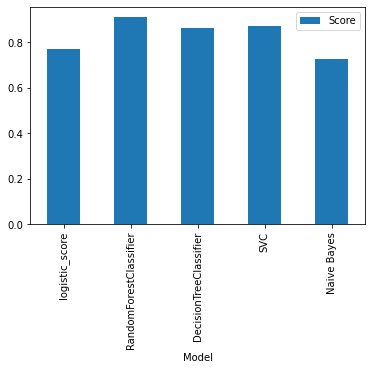

In [79]:
new_df.plot.bar()   #Random Forest model score is best

In [80]:
# Cross_val_score

In [81]:
ds_score = cross_val_score(DecisionTreeClassifier(),x_train, y_train)
np.mean(ds_score)

0.8637932226832643

In [82]:
rf_score = cross_val_score(RandomForestClassifier(n_estimators=150),x_train, y_train)
np.mean(rf_score)

0.8604495159059475

In [83]:
lr_score = cross_val_score(LogisticRegression(),x_train, y_train)
np.mean(lr_score)

0.7233921161825727

In [84]:
svm_score = cross_val_score(SVC(),x_train, y_train)
np.mean(svm_score)

0.8388520055325035

In [85]:
# save model in pickle format

import pickle

with open('Automobile_fraud_model_pickle', 'wb') as f:
    pickle.dump(random_model, f)